In [1]:
import sys
sys.executable


'd:\\Anaconda\\envs\\AIML\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re 
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data_fake=pd.read_csv("Fake.csv")
data_true=pd.read_csv("True.csv")

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
data_fake["class"]=0
data_true["class"]=1

In [7]:
print(data_fake.shape,data_true.shape)

(23481, 5) (21417, 5)


In [8]:
print(data_fake.index)

RangeIndex(start=0, stop=23481, step=1)


In [9]:
print(data_true.index)

RangeIndex(start=0, stop=21417, step=1)


In [10]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)
    

In [11]:
data_true_manual_testing=data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True  )  

In [12]:
print(data_fake.shape,data_true.shape)

(23471, 5) (21407, 5)


In [13]:
data_fake_manual_testing.loc[:, 'class'] = 0
data_true_manual_testing.loc[:, 'class'] = 1


In [14]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
data_merge =pd.concat([data_fake,data_true],axis=0)
print(data_merge)

                      

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21402  Exclusive: Trump's Afghan decision may increas...   
21403  U.S. puts more pressure on Pakistan to help wi...   
21404  Exclusive: U.S. to withhold up to $290 million...   
21405  Trump talks tough on Pakistan's 'terrorist' ha...   
21406  U.S., North Korea clash at U.N. forum over nuc...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

In [17]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
data=data_merge.drop(["title","subject","date"],axis=1)

In [19]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
data_merge=data_merge.sample(frac=1).reset_index(drop=True)

In [21]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [22]:
#data.reset_index(inplace=True)
#data.drop(['index'],axis=1,inplace=True)

In [23]:
data.columns

Index(['text', 'class'], dtype='object')

In [24]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [25]:
def textprocessing(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)



In [26]:
data_merge['test']=data_merge['text'].apply(textprocessing)

In [27]:
x=data['text']
y=data['class']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()  
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)  

In [30]:
print(xv_train.shape, y_train.shape)
print(xv_test.shape,y_test.shape)


(33658, 108587) (33658,)
(11220, 108587) (11220,)


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


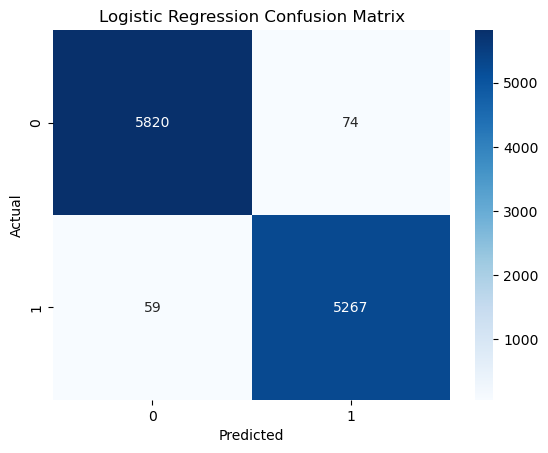

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
plot_cm(y_test, pred_lr, "Logistic Regression Confusion Matrix")

In [33]:
LR.score(xv_test,y_test)

0.9881461675579323

In [34]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5894
           1       0.99      0.99      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



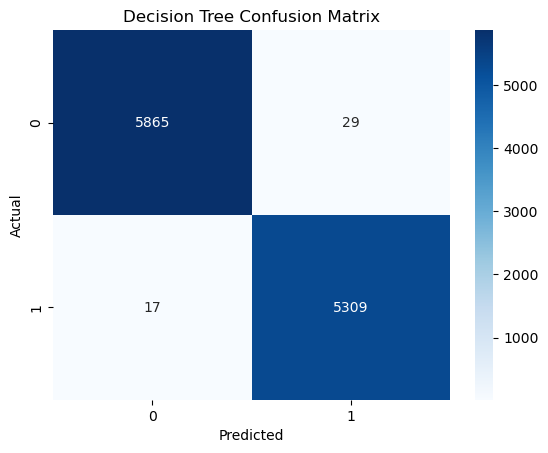

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)
pred_dt=DT.predict(xv_test)
plot_cm(y_test, pred_dt, "Decision Tree Confusion Matrix")

In [36]:

DT.score(xv_test,y_test)

0.9959001782531194

Accuracy: 0.9953654188948307
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5894
           1       0.99      1.00      1.00      5326

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



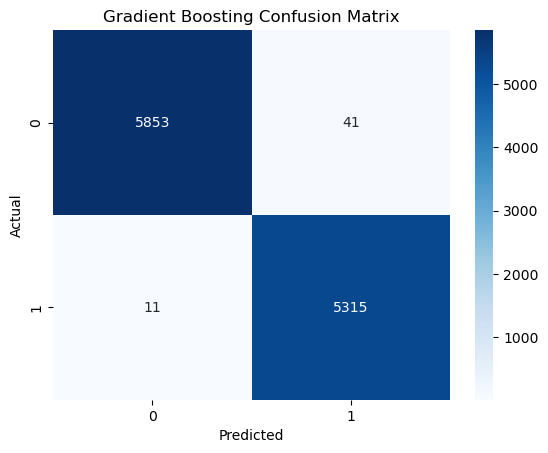

GradientBoostingClassifier(random_state=0)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

pred_gb = GB.predict(xv_test)
print("Accuracy:", GB.score(xv_test, y_test))
print(classification_report(y_test, pred_gb))
plot_cm(y_test, pred_gb, "Gradient Boosting Confusion Matrix")
GB


Random Forest Results:
Accuracy: 0.9868092691622103
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5894
           1       0.99      0.99      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



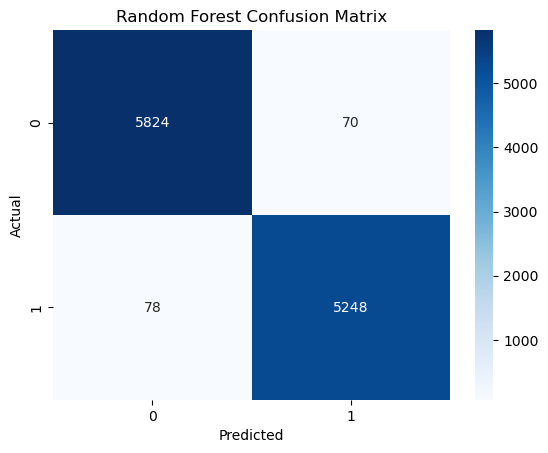

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

pred_rf = RF.predict(xv_test)
print("\nRandom Forest Results:")
print(f"Accuracy: {RF.score(xv_test, y_test)}")
print(classification_report(y_test, pred_rf))
plot_cm(y_test, pred_rf, "Random Forest Confusion Matrix")

In [40]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    

    new_def_test["text"] = new_def_test["text"].apply(textprocessing)  
    
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)  
    
    pred_LR = LR.predict(new_xv_test)   
    pred_DT = DT.predict(new_xv_test)   
    pred_GBC = GB.predict(new_xv_test) 
    pred_RFC = RF.predict(new_xv_test) 

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]), output_label(pred_DT[0]), output_label(pred_GBC[0]), output_label(pred_RFC[0])
))


In [47]:
user_news = "Scientists confirm the Earth will stop rotating by 2026, causing global blackouts."
manual_testing(user_news)




LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
